In [44]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
from pymc import MCMC

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pymc.Matplot import plot

In [2]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [3]:
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')

In [4]:
early_mean = Exponential('early_mean', beta=1.)
late_mean = Exponential('late_mean', beta=1.)

In [5]:
@deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson means '''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [6]:
disasters = Poisson('disasters', mu=rate, value=disasters_array, observed=True)

In [8]:
disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7f9bc98646a0>}

In [9]:
rate.children

{<pymc.distributions.new_dist_class.<locals>.new_class 'disasters' at 0x7f9bc98640b8>}

In [90]:
switchpoint.value = 1

In [91]:
early_mean.value = 10

In [92]:
late_mean.value = 10

In [93]:
switchpoint.value

array(1)

In [94]:
early_mean.value

array(10.)

In [95]:
late_mean.value

array(10.)

In [96]:
rate.parents.value

{'e': array(10.), 'l': array(10.), 's': array(1)}

Inference

In [97]:
M = MCMC((switchpoint, early_mean, late_mean, disasters))

In [98]:
M.sample(iter=10000, burn=1000, thin=1)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.9 sec

Plotting switchpoint
Plotting early_mean
Plotting late_mean


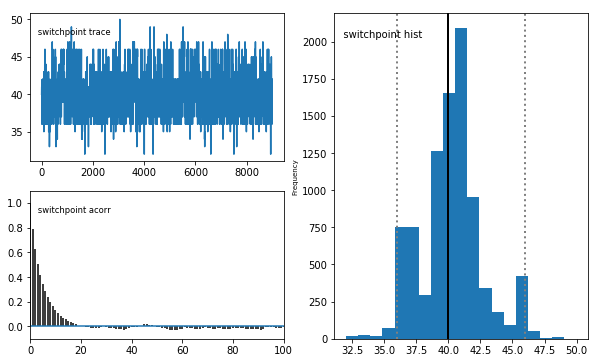

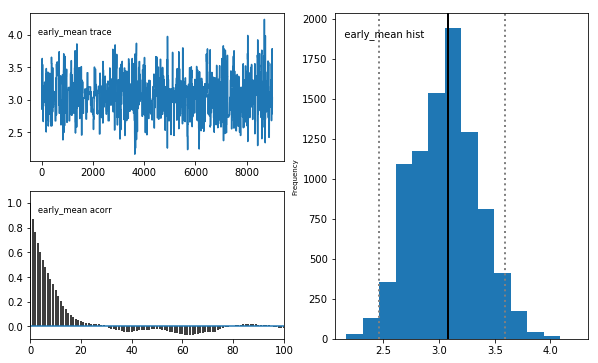

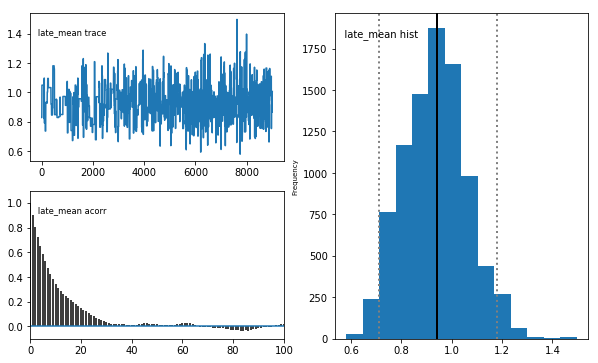

In [99]:
plot(M)